<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="400"></img></center>  
<br><br>
<center><h1><font color="#64a644">Kiva Microloans - A Data exploration</font></h1></center>
<br><br>


### <a id="0"></a><font color="#64a444">Content</font>
* <a href="#1" style="text-decoration:none"><font color="#64a444">Introduction</font></a>
* <a href="#2" style="text-decoration:none"><font color="#64a444">Prepare analysis</font></a>
* <a href="#3" style="text-decoration:none"><font color="#64a444">Summary of the data</font></a>
* <a href="#4" style="text-decoration:none"><font color="#64a444">Loans in numbers</font></a>
* <a href="#5" style="text-decoration:none"><font color="#64a444">References</font></a>



# <a id="1"></a><font color="#64a444">Introduction</font>  


[Kiva.org](https://www.kiva.org) is an online crowdfunding platform dedicated to extend financial services to poor people around the World.

Kiva is inviting the Kaggle community to help them build more localized models to estimate the poverty levels of residents in the regions where Kiva has active loans.


## <font color="#64a444">How Kiva works?</font>

The lending process by Kiva is simple, following just few steps:  

* The borrower mets with a Field Partner of Kiva and requests a loan;  

* The Field Partner disburses a loan to the borrower;  

* The Field Partner uploads the loan request to Kiva. The request is reviewed by a team of volunteer editors and translators and then published on Kiva.org;  

* Kiva lenders found the loan request, and Kiva sends the loan to the Field Partner;  

* The borrower makes repayments and the Field Partner send funds owed to Kiva. Kiva repays lenders;  

* The lenders can make another loan, donate to Kiva or withdraw their money to their PayPal account. 70% of the lenders choose to fund another loan.    

In this Kernel we will explore the data provided by Kiva, trying to understand the welfare condition of Kiva borrowers.  

# <a id="2"></a><font color="#64a444">Prepare analysis</font>  


## <font color="#64a444">Load packages</font>  

We will use, besides the usual `numpy` and `pandas` Python libraries, `plotly` for data visualization.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)

In [2]:
from data_quality_stats import missing_data, unique_values, most_frequent_values
from plot_style_utils import set_color_map

---

<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

## <font color="#64a444">Load the data</font>   

We will load two datasets:   
* Kiva's own dataset, [Data Science for Good: Kiva Crowdfunding](https://www.kaggle.com/datasets/kiva/data-science-for-good-kiva-crowdfunding);  
* [Country Statistics - UNData](https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles), contributed by [SRK](https://www.kaggle.com/sudalairajkumar)

In [3]:
kiva_loans_df = pd.read_csv("/kaggle/input/data-science-for-good-kiva-crowdfunding/kiva_loans.csv")
kiva_mpi_region_locations_df = pd.read_csv("/kaggle/input/data-science-for-good-kiva-crowdfunding/kiva_mpi_region_locations.csv")
loan_theme_ids_df= pd.read_csv("/kaggle/input/data-science-for-good-kiva-crowdfunding/loan_theme_ids.csv")
loan_themes_by_region_df = pd.read_csv("/kaggle/input/data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv")

In [4]:
country_profile_variables_df = pd.read_csv("/kaggle/input/undata-country-profiles/country_profile_variables.csv")
kiva_country_profiles_variables_df = pd.read_csv("/kaggle/input/undata-country-profiles/kiva_country_profile_variables.csv")

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

# <a id="3"></a><font color="#64a444">Summary of the data</font>

## </a><font color="#64a444">Data quality</font>

In [5]:
kiva_loans_df.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01


In [6]:
kiva_mpi_region_locations_df.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [7]:
loan_theme_ids_df.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [8]:
loan_themes_by_region_df.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [9]:
country_profile_variables_df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [10]:
kiva_country_profiles_variables_df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Armenia,WesternAsia,29743,2930,102.9,88.8,10529,3.0,3489.1,19.0,...,58.2,114,11.7,5.5/1.8,48,46,100.0/100.0,96.2/78.2,3.17,-99
3,Azerbaijan,WesternAsia,86600,9828,118.9,99.3,53049,0.7,5438.7,6.7,...,77.0,97,13.5,37.5/3.9,2459,61,94.7/77.8,91.6/86.6,0.14,-99
4,Belize,CentralAmerica,22966,375,16.4,99.2,1721,1.2,4789.4,14.6,...,41.6,117,60.1,0.5/1.4,9,36,98.9/100.0,93.5/88.2,1.68,-99


In [11]:
missing_data(kiva_loans_df)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
Total,0,0,0,0,0,4232,8,0,56800,0,13507,0,2396,48331,0,0,171416,4221,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.630508,0.001192,0.0,8.462392,0.0,2.012351,0.0,0.35697,7.200632,0.0,0.0,25.538546,0.628869,0.0,0.0
Types,int64,float64,float64,object,object,object,object,object,object,object,float64,object,object,object,float64,int64,object,object,object,object


In [12]:
missing_data(kiva_mpi_region_locations_df)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
Total,1788,1764,1764,1788,1764,1788,0,1880,1880
Percent,64.502165,63.636364,63.636364,64.502165,63.636364,64.502165,0.0,67.821068,67.821068
Types,object,object,object,object,object,float64,object,float64,float64


In [13]:
missing_data(loan_theme_ids_df)

,id,Loan Theme ID,Loan Theme Type,Partner ID
Total,0,14813,14813,14813
Percent,0.0,1.901316,1.901316,1.901316
Types,int64,object,object,float64


In [14]:
missing_data(loan_themes_by_region_df)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
Total,0,0,0,0,0,0,0,0,14536,14,...,0,0,2074,2075,0,2074,2074,14,6065,1392
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.374174,0.088968,...,0.0,0.0,13.179969,13.186324,0.0,13.179969,13.179969,0.088968,38.542196,8.845958
Types,int64,object,object,object,object,object,object,object,object,object,...,int64,object,object,object,object,float64,float64,object,object,float64


In [15]:
unique_values(kiva_loans_df)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
Total,671205,671205,671205,671205,671205,666973,671197,671205,614405,671205,657698,671205,668809,622874,671205,671205,499789,666984,671205,671205
Uniques,671205,610,479,163,15,424912,86,87,12695,67,366,667399,5719,498007,148,503,86719,11298,4,1298


In [16]:
unique_values(kiva_mpi_region_locations_df)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
Total,984,1008,1008,984,1008,984,2772,892,892
Uniques,984,102,102,928,6,452,881,880,787


In [17]:
unique_values(loan_theme_ids_df)

,id,Loan Theme ID,Loan Theme Type,Partner ID
Total,779092,764279,764279,764279
Uniques,779092,956,203,384


In [18]:
unique_values(loan_themes_by_region_df)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
Total,15736,15736,15736,15736,15736,15736,15736,15736,1200,15722,...,15736,15736,13662,13661,15736,13662,13662,15722,9671,14344
Uniques,302,302,11,718,170,79,2,9526,340,77,...,2532,9561,6557,6275,6558,6550,6015,392,335,56


In [19]:
unique_values(country_profile_variables_df)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
Total,229,229,229,229,229,229,229,229,229,229,...,229,229,229,229,229,229,229,229,229,229
Uniques,229,22,225,218,219,129,209,91,208,139,...,195,172,194,214,155,121,163,186,120,1


In [20]:
unique_values(kiva_country_profiles_variables_df)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
Total,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86
Uniques,86,19,86,85,86,64,85,57,84,74,...,81,81,83,84,77,47,81,85,77,1


In [21]:
most_frequent_values(kiva_loans_df)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
Total,671205,671205,671205,671205,671205,666973,671197,671205,614405,671205,657698,671205,668809,622874,671205,671205,499789,666984,671205,671205
Most frequent item,653051,225.0,225.0,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,145.0,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,14.0,8,user_favorite,female,monthly,2017-03-20
Frequence,1,34402,33157,72955,180302,5217,160441,160441,10000,160440,107188,25,2800,33,166750,34204,27088,426502,342717,1308
Percent from total,0.0,5.125,4.94,10.869,26.862,0.782,23.904,23.903,1.628,23.903,16.297,0.004,0.419,0.005,24.843,5.096,5.42,63.945,51.06,0.195


In [22]:
most_frequent_values(kiva_mpi_region_locations_df)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
Total,984,1008,1008,984,1008,984,2772,892,892
Most frequent item,"Badakhshan, Afghanistan",NGA,Nigeria,Central,Sub-Saharan Africa,0.006,"(1000.0, 1000.0)",14.497401,17.668887
Frequence,1,37,37,8,432,11,1880,3,4
Percent from total,0.102,3.671,3.671,0.813,42.857,1.118,67.821,0.336,0.448


In [23]:
most_frequent_values(loan_theme_ids_df)

,id,Loan Theme ID,Loan Theme Type,Partner ID
Total,779092,764279,764279,764279
Most frequent item,638631,a1050000000wf0q,General,145.0
Frequence,1,110264,380693,125375
Percent from total,0.0,14.427,49.811,16.404


In [24]:
most_frequent_values(loan_themes_by_region_df)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
Total,15736,15736,15736,15736,15736,15736,15736,15736,1200,15722,...,15736,15736,13662,13661,15736,13662,13662,15722,9671,14344
Most frequent item,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,Chouf,"(-1.2833333, 36.8166667)",PHL,...,1000,"Chouf, Lebanon","[(19.7126764, 105.8393447)]",Philippines,"(1000.0, 1000.0)",19.712676,105.839345,"Northern Mindanao, Philippines","(8.020163499999999, 124.6856509)",84.0
Frequence,1207,1207,13679,1152,5661,3467,13211,25,20,3467,...,196,25,43,137,2074,43,43,1174,1174,1209
Percent from total,7.67,7.67,86.928,7.321,35.975,22.032,83.954,0.159,1.667,22.052,...,1.246,0.159,0.315,1.003,13.18,0.315,0.315,7.467,12.139,8.429


In [25]:
most_frequent_values(country_profile_variables_df)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
Total,229,229,229,229,229,229,229,229,229,229,...,229,229,229,229,229,229,229,229,229,229
Most frequent item,Afghanistan,Caribbean,-99,2890,4.0,100.2,-99,-99,-99.0,-99,...,-99,104,-99,-99,0,-99,100.0/100.0,-99,-99,-99
Frequence,1,25,3,2,3,7,21,21,21,23,...,16,4,8,13,23,10,38,21,87,229
Percent from total,0.437,10.917,1.31,0.873,1.31,3.057,9.17,9.17,9.17,10.044,...,6.987,1.747,3.493,5.677,10.044,4.367,16.594,9.17,37.991,100.0


In [26]:
most_frequent_values(kiva_country_profiles_variables_df)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
Total,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86
Most frequent item,Afghanistan,EasternAfrica,652864,2930,54.4,99.5,-99,2.8,-99.0,19.0,...,19.0,42,8.1,-99,31,12,100.0/100.0,100.0/100.0,-99.0,-99
Frequence,1,12,1,2,1,4,2,4,2,3,...,2,2,2,3,3,5,6,2,5,86
Percent from total,1.163,13.953,1.163,2.326,1.163,4.651,2.326,4.651,2.326,3.488,...,2.326,2.326,2.326,3.488,3.488,5.814,6.977,2.326,5.814,100.0


---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

# <a id="4"></a><font color="#64a444">Loans in numbers</font>   

In [27]:
Markdown("""
Let’s explore now into more details the loans information.  
There are a number of **{}** loans, grouped in **{}** sectors, for **{}** activities, in **{}** countries and in **{}** different regions.  
The funded amounts are between **{}** and **{}** while the loan amount is between **{}** and **{}**, in **{}** different currencies.  
The term in months for repayment of loan ranges from **{}** to **{}** months.   
<font color="#64a444">**Note**</font>: this section was generated using **Markdown** feature, mixing executed code and static content (text).  

Let’s represent all sectors, and top 20 for activities, countries and regions by number of loans.


""".format(kiva_loans_df.sector.shape[0], 
        kiva_loans_df.sector.nunique(),
        kiva_loans_df.activity.nunique(),
        kiva_loans_df.country.nunique(),
        kiva_loans_df.region.nunique(),
        kiva_loans_df.funded_amount.min(),
        kiva_loans_df.funded_amount.max(),
        kiva_loans_df.loan_amount.min(),
        kiva_loans_df.loan_amount.max(),
        kiva_loans_df.currency.nunique(),
        kiva_loans_df.term_in_months.min(),
        kiva_loans_df.term_in_months.max())
)


Let’s explore now into more details the loans information.  
There are a number of **671205** loans, grouped in **15** sectors, for **163** activities, in **87** countries and in **12695** different regions.  
The funded amounts are between **0.0** and **100000.0** while the loan amount is between **25.0** and **100000.0**, in **67** different currencies.  
The term in months for repayment of loan ranges from **1.0** to **158.0** months.   
<font color="#64a444">**Note**</font>: this section was generated using **Markdown** feature, mixing executed code and static content (text).  

Let’s represent all sectors, and top 20 for activities, countries and regions by number of loans.




Let's setup the color scheme for this Notebook. We will use various shades of green, including the green theme used by Kiva.

Notebook Color Schema:


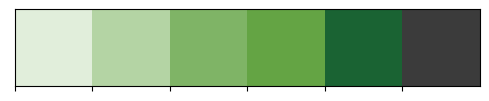

In [28]:
color_list = ["#e1eedb", "#b4d4a4", "#7fb466", "#64a444","#1a6333", "#3b3b3b"]
cmap_custom = set_color_map(color_list)

In [29]:
df = kiva_loans_df.groupby(["sector"])["loan_amount"].agg(["count", "min", "max", "mean", "median"]).reset_index()
df = df.sort_values(by="count", ascending=False)
sectors = go.Bar(
        x = df['sector'],
        y = df['count'],
        marker=dict(color=color_list[1])
    )
df2 = kiva_loans_df.groupby(["activity"])["loan_amount"].agg(["count", "min", "max", "mean", "median"]).reset_index()
df2 = df2.sort_values(by="count", ascending=False)
df2 = df2[0:20]
activities = go.Bar(
        x = df2['activity'],
        y = df2['count'],
        marker=dict(color=color_list[2])
    )
df3 = kiva_loans_df.groupby(["country"])["loan_amount"].agg(["count", "min", "max", "mean", "median"]).reset_index()
df3 = df3.sort_values(by="count", ascending=False)
df3 = df3[0:20]
countries = go.Bar(
        x = df3['country'],
        y = df3['count'],
        marker=dict(color=color_list[3])
    )
df4 = kiva_loans_df.groupby(["region"])["loan_amount"].agg(["count", "min", "max", "mean", "median"]).reset_index()
df4 = df4.sort_values(by="count", ascending=False)
df4 = df4[0:20]
regions = go.Bar(
        x = df4['region'],
        y = df4['count'],
        marker=dict(color=color_list[4])
    )

In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, start_cell="top-left",
                   subplot_titles=("Loans per sector", "Loans per activity (top 20)", 
                                   "Loans per country (top 20)", "Loans per region (top 20)"))

fig.add_trace(sectors, row=1, col=1)
fig.add_trace(activities, row=1, col=2)
fig.add_trace(countries, row=2, col=1)
fig.add_trace(regions, row=2, col=2)
layout = go.Layout(height=1100, width=900)
fig.update_layout(layout)
fig.update_layout(showlegend=False)
fig.show()

First three sectors in termns of number of loans are Agriculture, Food, Retail, all with over 100,000 loans.  

The first two activities are Farming and General Store, both with over 60,000 loans. Philippines is dominating the countries top, with over 150,000 loans, followed, at large distance, by Kenya and El Salvador. The top 3 identified regions are Kaduna, Lahore and Rawalpindi.  

Most of the loans are registered under unknown region (we can suppose that most of them will go to Philippines, but we will have to verify this).  

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

## <font color="#64a444">Loans per country and region</font>  

Let’s represent now the number of loans aggregated per country and region, as a treemap. We will filter only the first 100 entries/country. To show more than 100 entries/country is not necessary, since it will became very difficult to visualize (and is also using a lot of resources). 

df = kiva_loans_df.groupby(["country", "region"])["loan_amount"].agg(["count"]).reset_index()
df = df.sort_values(by=["country", "count"], ascending=False)
df = df.groupby(["country"]).head(100)
df.columns = ["Country", "Region", "Number of loans"]
fig = px.treemap(df, path=['Country', 'Region'], values='Number of loans',
                  color='Number of loans', hover_data=['Country'],
                  color_continuous_scale="Greens",
                  color_continuous_midpoint=np.average(df['Number of loans'], 
                                                       weights=df['Number of loans']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), height=1000,
                 title="Loans per country and region (top 100 regions per country)")
fig.show()

Let's also look to the loans per country. For this we will use cloropleth maps in plotly express.

In [31]:
kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [32]:
country_profile_variables_df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [33]:
df = kiva_loans_df.groupby(["country", "country_code"])["loan_amount"].agg(["count"]).reset_index()

In [34]:
!pip install country-converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.7 MB/s eta 0:00:00


In [35]:
import country_converter as cc

In [36]:
df = kiva_loans_df.groupby(["country", "country_code"])["loan_amount"].agg(["count"]).reset_index()
df['iso_alpha'] = df.country_code.apply(lambda x: cc.convert(x, to='ISO3'))
fig = px.choropleth(df,locations='iso_alpha', color='count',
                           color_continuous_scale="Greens",
                           scope="world",
                           labels={'count':'Number of loans'}
                          )
fig.update_layout(title='Loans per country<br>Source:<a href="https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding">Kiva - Data Science for Good</a>')
fig.show()

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

## <font color="#64a444">Loans per sector and activity</font>  

Let’re represent now the treemap for the couple {sectors, activities}, showing the size and color of tiles proportional with the number of loans.

df = kiva_loans_df.groupby(["sector", "activity"])["loan_amount"].agg(["count"]).reset_index()
df = df.sort_values(by=["sector", "activity"], ascending=False)
df.columns = ["Sector", "Activity", "Number of loans"]
fig = px.treemap(df, path=["Sector", "Activity"], values='Number of loans',
                  color='Number of loans', hover_data=['Sector'],
                  color_continuous_scale="Greens",
                  color_continuous_midpoint=np.average(df['Number of loans'], 
                                                       weights=df['Number of loans']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), height=1000,
                 title="Loans per sector and activity")
fig.show()

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

## <font color="#64a444">Loans currencies</font>  

Let’s see now what are the currencies in which these loans are given. First, let's look for the currency used in each country.

df = kiva_loans_df.groupby(["country", "currency"])["loan_amount"].agg(["count"]).reset_index()
df = df.sort_values(by=["country", "currency"], ascending=False)
df.columns = ["Country", "Currency", "Number of loans"]
fig = px.treemap(df, path=["Country", "Currency"], values='Number of loans',
                  color='Number of loans', hover_data=['Country'],
                  color_continuous_scale="Greens",
                  color_continuous_midpoint=np.average(df['Number of loans'], 
                                                       weights=df['Number of loans']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), height=1000,
                 title="Loans per country and currency")
fig.show()

Most of the loans are in PHP (for Philippines - which is natural, since Phillipines has most of the loans) and in USD (El Salvador, Ecuador, Palestine, Lebanon, United States, Cambodia, Nicaragua).  

Let’s check as well the distribution of loan amount for the loans in USD, the term in months and the repayment interval.  

We start with the distribution of loan amount for the loans in USD, grouped by sectors. We will also remove upper 99% quantile.

In [37]:
q99 = np.quantile(kiva_loans_df.loan_amount, 0.99)
df = kiva_loans_df.loc[(kiva_loans_df.currency=="USD") & (kiva_loans_df.loan_amount < q99)][["sector", "loan_amount", "currency"]]

def draw_trace(dataset, sector, feature):
    dfS = dataset[dataset['sector']==sector];
    trace = go.Box(
        x = dfS[feature],
        name=sector,
        marker=dict(
                    line=dict(
                        color='black',
                        width=0.8),
                ),
        text=dfS['sector'], 
    )
    return trace


def draw_group(dataset, feature, title, feature_title, sectors, height=800):
    data = list()
    for sector in sectors:
        data.append(draw_trace(dataset, sector, feature))


    layout = dict(title = title,
              xaxis = dict(title = feature_title,showticklabels=True),
              yaxis = dict(title = 'Sector', showticklabels=True, tickfont=dict(
                family='Old Standard TT, serif',
                size=12,
                color='black'),), 
              hovermode = 'closest',
              showlegend=False,
                  width=800,
                  height=height,
             )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='loans-sector')

draw_group(df, "loan_amount", 
           "Loans amounts per sector (only USD loans)", 
           'Amount of loans (USD)', 
           df.sector.unique())

We can see that for Housing sector, both the average and variation of values are smallest whilst for Entertainment the average is the largest as well as the variation. Also there are a lot of outliers in the fourth Quartile.

Let’s show on a map the geographical distribution of USD loans (hover over the countries to see the details for each country).

In [38]:
df = kiva_loans_df.loc[kiva_loans_df.currency=="USD"].groupby(["country"])["loan_amount"].sum().reset_index()

In [39]:
df['iso_alpha'] = df.country.apply(lambda x: cc.convert(x, to='ISO3'))
fig = px.choropleth(df,locations='iso_alpha', color='loan_amount',
                           color_continuous_scale="Greens",
                           scope="world",
                           labels={'loan_amount':'Total loans amount'}
                          )
fig.update_layout(title='Loans per country<br>Source:<a href="https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding">Kiva - Data Science for Good</a>')
fig.show()

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

## <font color="#64a444">Loan repayment term</font>

We follow with the distribution of the loan repayment term (in months), grouped by sectors.


draw_group(kiva_loans_df, "term_in_months", 
           "Loans repayment terms per sector", 
           'Loans repayment terms (months)', 
           kiva_loans_df.sector.unique())

We observe that most of the Sectors have small repayment period, with around 12 month average (with Food and Retail with lowest averages). The largest average values are for Entertainment, Education and Housing.

Education has a lot of outliers in the upper Quartile which shows a larger spread of repayment months, up to 150 months.

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

## <font color="#64a444">Loan repayment interval</font> 

We show here the number of loans for each Sector, grouped by repayment interval (monthly, irregular, weekly, bullet).

In [40]:
repayment_interval = kiva_loans_df.repayment_interval.unique()
repayment_interval

array(['irregular', 'bullet', 'monthly', 'weekly'], dtype=object)

In [41]:
data = []
cl =[5, 2, 1, 4]
for i, ry in enumerate(repayment_interval):
    df = kiva_loans_df.loc[kiva_loans_df.repayment_interval==ry]
    df = df.groupby("sector")["loan_amount"].count().reset_index()
    df.columns = ["sector", "loans"]
    trace = go.Bar(
        x = df['sector'],y = df['loans'],
        name=ry,
         marker=dict(
                    color=color_list[cl[i]],
                    line=dict(
                        color=color_list[cl[i]],
                        width=1),
                    opacity=0.9,
                ),
        text= df['sector'],
    )
    data.append(trace)
    
layout = dict(title = 'Loans per sector and repayment interval',
          xaxis = dict(title = 'Sector', showticklabels=True), 
          yaxis = dict(title = 'Loans'),
          hovermode = 'closest',
          #barmode='stack',
          width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='sector-repayment-interval')

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

## <font color="#64a444">Loan borowers</font>

In [42]:
def get_gender_count(text,gen="female"):
    count = 0
    try:
        text = text.split(",")
        for t in text:
            if gen == t.rstrip().lstrip():
                count+=1
    except:
        return count
        
    return count
kiva_loans_df["n_male"] = kiva_loans_df["borrower_genders"].apply(lambda x: get_gender_count(x, "male"))
kiva_loans_df["n_female"] = kiva_loans_df["borrower_genders"].apply(lambda x: get_gender_count(x, "female"))

In [43]:
kiva_loans_df["borrower_gen"] = "Not specified"
kiva_loans_df.loc[(kiva_loans_df.n_male !=0) & (kiva_loans_df.n_female ==0), "borrower_gen"] = "Male"
kiva_loans_df.loc[(kiva_loans_df.n_male ==0) & (kiva_loans_df.n_female !=0), "borrower_gen"] = "Female"
kiva_loans_df.loc[(kiva_loans_df.n_male !=0) & (kiva_loans_df.n_female !=0), "borrower_gen"] = "Female & Male"

df = kiva_loans_df.groupby("borrower_gen")["loan_amount"].count().reset_index()
df.columns = ["Borrower Gender", "Number of loans"]
df.sort_values(by="Number of loans", ascending=False)
trace = go.Bar(
    x = df["Borrower Gender"],y = df['Number of loans'],
    marker=dict(
                color=color_list[3],
                line=dict(
                    color=color_list[5],
                    width=1),
                opacity=0.9,
            ),
)
data = [trace]
    
layout = dict(title = 'Loans per borrower gender',
          xaxis = dict(title = 'Borrower genders', showticklabels=True), 
          yaxis = dict(title = 'Loans'),
          hovermode = 'closest',
          width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='borrower-genders')


In [44]:
df = kiva_loans_df.loc[kiva_loans_df.n_female>0]
df = df.groupby(["sector"])["n_female"].agg(["count", "mean", "max"]).reset_index()
df = df.sort_values(by="mean", ascending=False)
sectors_f = go.Bar(
        x = df['sector'],
        y = df['mean'],
        name="Female borrowers",
        marker=dict(color=color_list[4]))
df2 = kiva_loans_df.loc[kiva_loans_df.n_male>0]
df2 = df2.groupby(["sector"])["n_male"].agg(["count", "mean", "max"]).reset_index()
df2 = df2.sort_values(by="mean", ascending=False)
sectors_m = go.Bar(
        x = df2['sector'],
        y = df2['mean'],
        name="Male borrowers",
        marker=dict(color=color_list[3]))
fig = make_subplots(rows=1, cols=2, start_cell="top-left",
                   subplot_titles=("Loans with at least one female borrower", 
                                   "Loans with at least one male borrower"))

fig.add_trace(sectors_f, row=1, col=1)
fig.add_trace(sectors_m, row=1, col=2)
layout = go.Layout(height=400, width=900, title="Average number of female/male borowers/loan")
fig.update_layout(layout)
fig.update_layout(showlegend=False)
fig.show()

In [45]:
df = df.sort_values(by="max", ascending=False)
sectors_f = go.Bar(
        x = df['sector'],
        y = df['max'],
        name="Female borrowers",
        marker=dict(color=color_list[4]))
df2 = df2.sort_values(by="max", ascending=False)
sectors_m = go.Bar(
        x = df2['sector'],
        y = df2['max'],
        name="Male borrowers",
        marker=dict(color=color_list[3]))
fig = make_subplots(rows=1, cols=2, start_cell="top-left",
                   subplot_titles=("Loans with at least one female borrower", 
                                   "Loans with at least one male borrower"))

fig.add_trace(sectors_f, row=1, col=1)
fig.add_trace(sectors_m, row=1, col=2)
layout = go.Layout(height=400, width=900, title="Maximum number of female/male borowers/loan")
fig.update_layout(layout)
fig.update_layout(showlegend=False)
fig.show()


---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

# <a id="5"></a><font color="#64a444">References</font>  

[1] Kiva, https://www.kaggle.com/kiva  

[2] Data Science for Good: Kiva Crowdfunding, Kaggle Dataset, https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding  

[3] UN Data country profiles, Kaggle Dataset, https://www.kaggle.com/sudalairajkumar/undata-country-profiles  

[4] Multidimensional poverty index (MPI), http://hdr.undp.org/en/content/multidimensional-poverty-index-mpi  

[5] Multidimensional poverty index, Wikipedia, https://en.wikipedia.org/wiki/Multidimensional_Poverty_Index  

[6] Kiva: Loans that change lives, https://theglobalheroes.wordpress.com/2012/11/01/kiva-loans-that-change-lives/  

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>